In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sea
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df = pd.read_csv('../../../data/fandango_score_comparison.csv')
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
list(df)

['FILM',
 'RottenTomatoes',
 'RottenTomatoes_User',
 'Metacritic',
 'Metacritic_User',
 'IMDB',
 'Fandango_Stars',
 'Fandango_Ratingvalue',
 'RT_norm',
 'RT_user_norm',
 'Metacritic_norm',
 'Metacritic_user_nom',
 'IMDB_norm',
 'RT_norm_round',
 'RT_user_norm_round',
 'Metacritic_norm_round',
 'Metacritic_user_norm_round',
 'IMDB_norm_round',
 'Metacritic_user_vote_count',
 'IMDB_user_vote_count',
 'Fandango_votes',
 'Fandango_Difference']

In [4]:
df.rename(columns={'Metacritic_user_nom': 'Metacritic_user_norm'}, 
          inplace=True)

In [5]:
rankings_list = ['Fandango_Stars', 'RT_user_norm', 'RT_norm', 'IMDB_norm',
                 'Metacritic_user_norm', 'Metacritic_norm']

In [6]:
def my_heatmap(df):
    fig, axes = plt.subplots()
    sea.heatmap(df, annot=True)

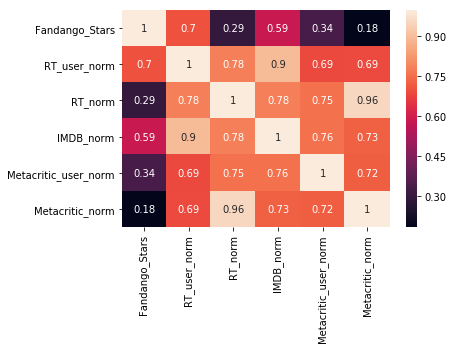

In [7]:
my_heatmap(df[rankings_list].corr(method='pearson'))

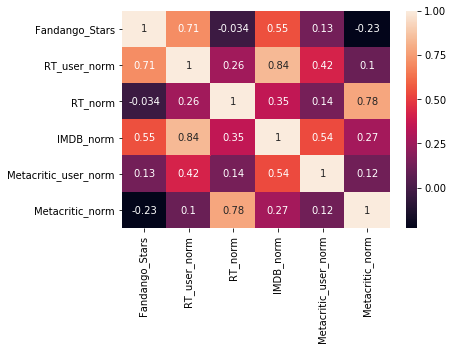

In [8]:
RT_list = df.RT_norm >= 4.
my_heatmap(df[RT_list][rankings_list].corr(method='pearson'))

In [9]:
feature_cols = ['Fandango_Stars', 'RT_user_norm', 'RT_norm', 
                'Metacritic_user_norm', 'Metacritic_norm']
X = df[feature_cols]
X.head()

,Fandango_Stars,RT_user_norm,RT_norm,Metacritic_user_norm,Metacritic_norm
0,5.0,4.3,3.70,3.55,3.30
1,5.0,4.0,4.25,3.75,3.35
2,5.0,4.5,4.00,4.05,3.20
3,5.0,4.2,0.90,2.35,1.10
4,3.5,1.4,0.70,1.70,1.45


In [10]:
y = df['IMDB_norm']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1111)

In [12]:
dim = len(feature_cols)
dim += 1 # for intercept

In [14]:
X_train = X_train.assign(
    independent = pd.Series([1] * len(y_train), index=X_train.index))
X_train = X_test.assign(
    independent = pd.Series([1] * len(y_train), index=X_test.index))
X_train.head()

,Fandango_Stars,RT_user_norm,RT_norm,Metacritic_user_norm,Metacritic_norm,independent
101,3.0,1.35,0.8,3.50,1.50,1
110,4.0,2.60,2.6,3.45,2.80,1
51,4.5,3.40,1.6,2.60,1.90,1
70,4.5,4.35,5.0,3.00,4.15,1
58,3.5,1.75,0.6,1.95,1.50,1


In [ ]:
)